# **Task C1** 
## Analyzing the Avocado Data

##### This task uses the avocado dataset. The dataset contains historical data on avocado prices and sales volume in multiple U.S. markets. One of the columns in this dataset, Unnamed: 0, contains sequential numbers that are irrelevant to analyzing this data. Three of the other columns contain sales for PLU (price look-up) codes 4046, 4225, and 4770. These columns will not be used in this task. If you review the data, you’ll see that some of the regions overlap. For example, one of the regions is the entire U.S., and all of the other regions are parts of the U.S. Because of that, you would need to review this data carefully before determining the best way to analyze it. For the purposes of this task though, the overlapping regions won’t be taken into consideration.

##### https://www.kaggle.com/neuromusic/avocado-prices

<img src="avocado-logo.png" alt="SIT112 Avocado!" width="1800" height="200">




### A. Instructions

1. Make sure you have completed Task P1 before working on this task. 
2. Complete the task based on the comments and hints provided in the following sections.   
3. Complete the TaskCompletionReport from. 
4. Before submission, please make sure you have executed all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
5. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution (code) as an "ipynb" file (do not zip/combine them). You can do this by the end of Week 12, but feedback will only be provided for submissions received by 11 AM on the due date. <font color="red">Please do not include the dataset in your submission. </font>
6. The workshops are the primary venue for you to seek help if you need any clarification/assitance. The tutors are there to help you complete and submit the tasks. Please avoid emailing your code or screenshots to the tutors outside workshop hours. 
7. Consider using online resources such as ChatGPT to strenghten your undertanding of the task. 

Good luck :)

### B. Write Python code that performs (answers) the following operations (questions) 

In [2]:
import pandas as pd

##### 1. Read the data from the CSV file into a DataFrame.

In [5]:
# write your code here
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### 2. Multiply the Total Volume and AveragePrice columns, and store the result in a new column called EstimatedRevenue. Then, calculate the EstimatedRevenue for each region, sort the resulting data in descending order by EstimatedRevenue, and display the top 5 regions, except TotalUS, with the highest EstimatedRevenue.

* Hint: the estimated revenue of region x = sum of the estimated revenues in region x

In [ ]:
# change the scientific notation to read the total estimated revenue easily.\
pd.set_option('display.float_format', '{:,.2f}'.format)

# multiply the Total Volume and AveragePrice columns to create a new column called EstimatedRevenue
data['EstimatedRevenue'] = data['Total Volume'] * data['AveragePrice']

# group the data by region and calculate the total estimated revenue for each region
grouped_data = data.groupby('region')['EstimatedRevenue'].sum().reset_index()

# ecxlude TotalUS
filtered_data = grouped_data[grouped_data['region'] != 'TotalUS']

# sort the data in descending order by EstimatedRevenue and display the top 5 regions with the highest revenue
sorted_data = filtered_data.sort_values(by="EstimatedRevenue", ascending=False)
sorted_data.head(5)


,region,EstimatedRevenue
6,California,"1,121,414,026.51"
52,West,"1,066,833,656.04"
29,Northeast,"960,007,873.70"
45,SouthCentral,"874,059,289.26"
46,Southeast,"703,630,581.04"


##### 3. Create a bar plot that shows the mean, median, and standard deviation of the Total Volume of the organic avocados sold in the regions with the highest overall Total Volume from (including) 2017.

,region,Total Volume
51,West,"12,241,845.79"
29,Northeast,"11,760,003.74"
15,GreatLakes,"8,928,083.94"
6,California,"8,417,151.48"
45,SouthCentral,"7,104,671.46"


<Axes: xlabel='region'>

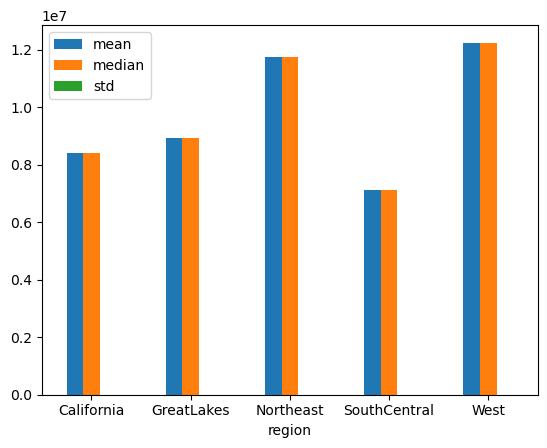

In [89]:
import matplotlib.pyplot as plt
# write your code here

# Extract the data for organic avocados from (including) 2017 and group it by region, excluding the TotalUS region.
filtered_data = data[(data['year'] == 2017) & (data['type'] == 'organic') & (data['region'] != 'TotalUS')]



# Get the 5 regions with the highest Total Volume and extract their data.
top5 = filtered_data.groupby('region')['Total Volume'].sum().reset_index().sort_values(by="Total Volume", ascending=False).head(5)

display(top5)
# Create a bar plot showing the mean, median, and standard deviation of the Total Volume of organic avocados in the 5 regions with the highest Total Volume from 2017.
# stats = top5.groupby('region')['Total Volume'].agg(['mean', 'median', 'std'])


stats.plot(kind='bar', y=["mean", "median", "std"], rot=0)



##### 4. What is the mean and median of AveragePrice for each type of avocado (organic and conventional) in 2018? Be sure to include just the type, MeanPrice, and MedianPrice columns in the results.

In [8]:
# write your code here

# Extract the data for organic and conventional avocados in 2018.

# Calculate the mean and median price for each type of avocado in 2018.

# Select the 'type', 'MeanPrice', and 'MedianPrice' columns and display the results.


##### 5. Analyze the consistency of sales for Small Bags, Large Bags, XLarge Bags, and Total Bags of the top 3 avocado producing regions (excluding TotalUS) for each type of avocado over time. 

##### *To explain consistency of sales, use the coefficient of variation, which is a statistical measure used to determine the consistency or variability of a data set. It is calculated as the ratio of the standard deviation to the mean, expressed as a percentage. Higher values of the coefficient of variation indicate greater variability or inconsistency in the data, while lower values indicate more consistency in the data.* 

In [6]:
# write your code here

# Get the top 3 regions (excluding TotalUS) with the highest sum of Total Volume

# Get the sales of Small Bags, Large Bags, XLarge Bags, and Total Bags for each region and type of avocado

# Calculate the coefficient of variation for each region and bag type, by dividing the standard deviation of the bags sold by the mean number of bags sold.

# Print the results


### C. Learn more
* https://www.statisticshowto.com/probability-and-statistics/how-to-find-a-coefficient-of-variation/